In [1]:
import pynucastro as pyna
from pynucastro.networks import StarKillerNetwork

library_file = "20180319default2"
mylibrary = pyna.rates.Library(library_file)

data_list = mylibrary.get_rates()

all_nuclei = ["p","he4","ne20","o20","f20","mg24","al27","o16","si28","s32","p31"]

escn_library = mylibrary.linking_nuclei(all_nuclei,with_reverse=True)
escn_tabular = ["f20--o20-toki","ne20--f20-toki"]

In [2]:
rc = pyna.RateCollection(libraries=[escn_library],rate_files=escn_tabular)
#rc = pyna.RateCollection(libraries=[escn_library])

comp = pyna.Composition(rc.get_nuclei())
comp.set_nuc("o16", 0.5)
comp.set_nuc("ne20", 0.3)
comp.set_nuc("mg24", 0.1)
comp.set_nuc("o20", 1.e-5)
comp.set_nuc("f20", 1.e-5)
comp.set_nuc("p", 1.e-5)
comp.set_nuc("he4", 1.e-2)
comp.set_nuc("al27", 1.e-2)
comp.set_nuc("si28", 1.e-2)
comp.set_nuc("s32", 1.e-2)
comp.set_nuc("p31", 1.e-2)
comp.normalize()

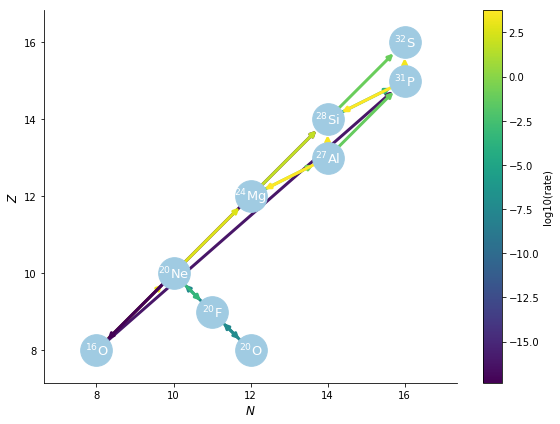

In [3]:
rc.plot(outfile="ecsn.png", rho=7.e9, T=1.e9, comp=comp, rate_value=1.e-20)

In [67]:
new_rate_list = []
ydots = rc.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)
for rate in rc.rates:
    if ydots[rate] >= 1.e-20 and ydots[rate] <= 3.0e3:
        new_rate_list.append(rate)
        
rc_new = pyna.RateCollection(rates=new_rate_list)

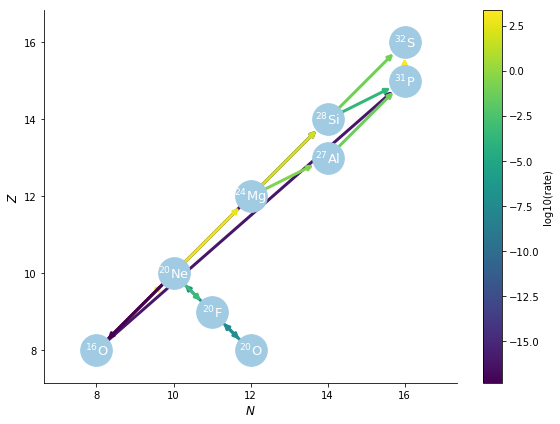

In [68]:
rc_new.plot(outfile="ecsn.png", rho=7.e9, T=1.e9, comp=comp)

In [69]:
rc_new.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)

OrderedDict([(o20 --> f20, 2.702249897457067e-08),
             (f20 --> ne20, 3.286505102773197e-08),
             (ne20 --> he4 + o16, 4.631669519815501e-18),
             (o16 + he4 --> ne20, 2163.4896055892013),
             (ne20 + he4 --> mg24, 470.4657166295948),
             (mg24 + he4 --> si28, 65.33425925449087),
             (al27 + he4 --> p31, 0.057635811259143355),
             (si28 + he4 --> s32, 0.08322738610569617),
             (p31 + p --> s32, 2375.130496403913),
             (o16 + o16 --> p + p31, 7.154939895463953e-17),
             (o16 + o16 --> he4 + si28, 2.5949312230335836e-17),
             (mg24 + he4 --> p + al27, 0.2543862399303774),
             (si28 + he4 --> p + p31, 0.00019528201299493395),
             (f20 --> o20, 6.765696872730337e-08),
             (ne20 --> f20, 0.00046418797301137863)])

In [70]:
rc.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)

OrderedDict([(o20 --> f20, 2.702249897457067e-08),
             (f20 --> ne20, 3.286505102773197e-08),
             (ne20 --> he4 + o16, 4.631669519815501e-18),
             (mg24 --> he4 + ne20, 4.744790037605823e-42),
             (si28 --> p + al27, 2.2702059658516468e-49),
             (si28 --> he4 + mg24, 9.17815550598163e-47),
             (p31 --> he4 + al27, 9.75972961036992e-47),
             (s32 --> p + p31, 2.504262075058157e-36),
             (s32 --> he4 + si28, 2.4655741369058092e-33),
             (o16 + he4 --> ne20, 2163.4896055892013),
             (ne20 + he4 --> mg24, 470.4657166295948),
             (mg24 + he4 --> si28, 65.33425925449087),
             (al27 + p --> si28, 3786.5889540808494),
             (al27 + he4 --> p31, 0.057635811259143355),
             (si28 + he4 --> s32, 0.08322738610569617),
             (p31 + p --> s32, 2375.130496403913),
             (o16 + o16 --> p + p31, 7.154939895463953e-17),
             (o16 + o16 --> he4 + si28, 2.5949312

In [71]:
wd_net = StarKillerNetwork(rates=new_rate_list)

In [72]:
wd_net.rates

[o20 --> f20,
 f20 --> ne20,
 ne20 --> he4 + o16,
 o16 + he4 --> ne20,
 ne20 + he4 --> mg24,
 mg24 + he4 --> si28,
 al27 + he4 --> p31,
 si28 + he4 --> s32,
 p31 + p --> s32,
 o16 + o16 --> p + p31,
 o16 + o16 --> he4 + si28,
 mg24 + he4 --> p + al27,
 si28 + he4 --> p + p31,
 f20 --> o20,
 ne20 --> f20]

In [73]:
len(wd_net.rates)

15

In [74]:
len(rc_new.rates)

15

In [75]:
wd_net.write_network(use_cse=True)